In [1]:
### To save time, I will just be categorizing the different kinds of apples rather than all the fruits

from sklearn.datasets import load_files
import numpy as np
import tensorflow as tf
import PIL.Image
import glob

#DATA_LIST = os.listdir('/content/drive/MyDrive/two')
#train_dir  = '/content/drive/MyDrive/two/train'
train_dir = 'fruits-360_dataset/fruits-360/Training'
test_dir = 'fruits-360_dataset/fruits-360/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

2022-04-21 09:49:40.845083: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-21 09:49:40.845152: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_files = glob.glob('{}/*/*'.format(train_dir))

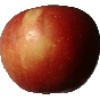

In [3]:
with PIL.Image.open(train_files[0]) as im:
    im.show()
    arr = np.asarray(im)
# arr

In [4]:
x_train, y_train, target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)           

print('Training set size : ', x_train.shape[0])
print('Test set size : ', x_test.shape[0])

Training set size :  6404
Test set size :  2134


In [5]:
num_classes = len(np.unique(y_train))
num_classes

13

In [6]:
print(y_train[0:10])
# represents labels of apples (ex. 3 is one apple, 12 is a different one but all 12's are the same apple, etc.)
# need to change to vector of 13 elements, one for each class

[ 3 12 10  7  2 12 12 11 10  6]


In [7]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_train[0] # recorded as 3

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
# separating test set into validation and test set
x_test, x_valid = x_test[1100:], x_test[:1100]
y_test, y_valid = y_test[1100:], y_test[:1100]
print('Vaild x size : ', x_valid.shape)
print('Vaild y size : ', y_valid.shape)
print('Test x size: ' , x_test.shape)
print('Test y size : ', y_test.shape)

Vaild x size :  (1100,)
Vaild y size :  (1100, 13)
Test x size:  (1034,)
Test y size :  (1034, 13)


In [9]:
x_train[0]
# need to extract pixels from file name

'fruits-360_dataset/fruits-360/Training/Apple Golden 2/189_100.jpg'

In [10]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array = []
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))    # converts image to array
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ', x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ', x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ', x_test.shape)

print('General training image shape : ', x_train[0].shape)

Training set shape :  (6404, 100, 100, 3)
Validation set shape :  (1100, 100, 100, 3)
Test set shape :  (1034, 100, 100, 3)
General training image shape :  (100, 100, 3)


In [11]:
print('Training image as array : ', x_train[0])

Training image as array :  [[[252. 255. 255.]
  [252. 255. 255.]
  [254. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[252. 255. 255.]
  [252. 255. 255.]
  [254. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[254. 255. 255.]
  [254. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [12]:
# need to rescale so pixel values are 0 - 1 to normalize the learning
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[0.9882353 , 1.        , 1.        ],
        [0.9882353 , 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.9882353 , 1.        , 1.        ],
        [0.9882353 , 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

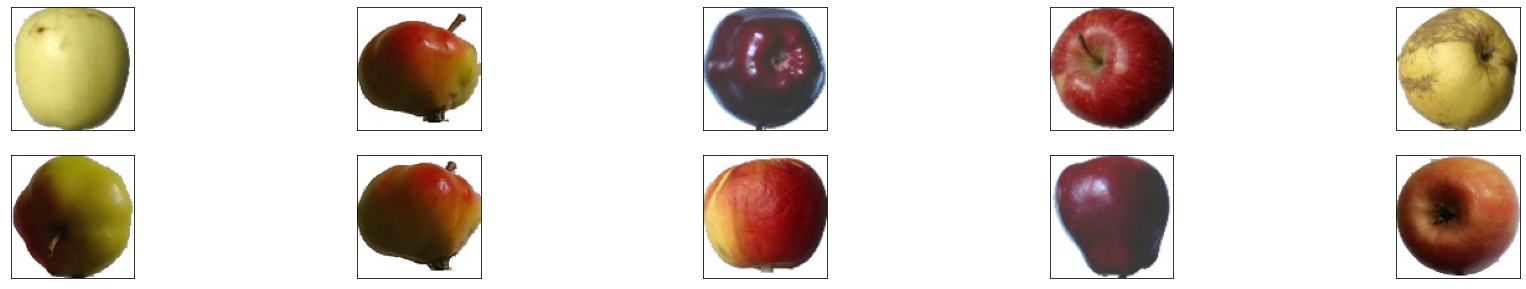

In [13]:
# Visualizing some training images
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (30,5))
for i in range(10):
    im = fig.add_subplot(2, 5, i+1, xticks = [], yticks = [])
    im.imshow(np.squeeze(x_train[i]))

In [14]:
# Creating CNN
# Conv -> Maxpool -> Dropout -> Flatten -> Dense

# Conv creates same dimension output

# https://github.com/dnouri/nolearn/blob/master/docs/notebooks/CNN_tutorial.ipynb
# The layers we use are the following: 
# InputLayer: We have to specify the shape of the data. 
#    For image data, it is batch size x color channels x image dimension 1 x image dimension 2 (aka bc01). 
#    Here you should generally just leave the batch size as None, so that it is taken care off automatically. 
#    The other dimensions are given by X.
#Conv2DLayer: The most important keywords are _numfilters and _filtersize. 
#    The former indicates the number of channels -- the more you choose, the more different filters can be learned by the CNN. 
#    Generally, the first convolutional layers will learn simple features, such as edges, while deeper layers can learn more 
#        abstract features. Therefore, you should increase the number of filters the deeper you go. 
#    The _filtersize is the size of the filter/kernel. The current consensus is to always use 3x3 filters, as these allow 
#        to cover the same number of image pixels with fewer parameters than larger filters do.
#MaxPool2DLayer: This layer performs max pooling and hopefully provides translation invariance. We need to indicate the 
#    region over which it pools, with 2x2 being the default of most users.
#DenseLayer: This is your vanilla fully-connected layer; you should indicate the number of 'neurons' with the _numunits argument
#    The very last layer is assumed to be the output layer. We thus set the number of units to be the number of classes, 
#        10, and choose softmax as the output nonlinearity, as we are dealing with a classification task.
#DropoutLayer: Dropout is a common technique to regularize neural networks. 
#    It is almost always a good idea to include dropout between your dense layers.

# debate changing activation function, kernel sizes, filters, epochs, etc.
# using ReLU (max(0,x) in this case since it's simple for this non-linear transformation of images
#    and it doesn't have a vanishing gradient

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, input_shape = (100,100,3), activation = 'relu', padding='same'))
model.add(Activation('relu')) # maybe put inside like the rest
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 32, kernel_size = 2, activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(13,activation = 'softmax')) #change to 13 cuz 13 labels ?
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      208       
                                                                 
 activation (Activation)     (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        8

2022-04-21 09:50:49.967602: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-21 09:50:49.967644: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-21 09:50:49.967772: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-EOEOQ50V): /proc/driver/nvidia/version does not exist
2022-04-21 09:50:49.968584: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compile Complete')

Compile Complete


In [16]:
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=30,
        validation_data=(x_valid, y_valid),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

# Don't need that many epochs for best model

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.52007, saving model to cnn_from_scratch_fruits.hdf5
201/201 - 13s - loss: 0.9451 - accuracy: 0.6775 - val_loss: 0.5201 - val_accuracy: 0.7764 - 13s/epoch - 65ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 0.52007
201/201 - 12s - loss: 0.2129 - accuracy: 0.9286 - val_loss: 0.6623 - val_accuracy: 0.8664 - 12s/epoch - 60ms/step
Epoch 3/30

Epoch 3: val_loss improved from 0.52007 to 0.10876, saving model to cnn_from_scratch_fruits.hdf5
201/201 - 13s - loss: 0.1054 - accuracy: 0.9685 - val_loss: 0.1088 - val_accuracy: 0.9491 - 13s/epoch - 66ms/step
Epoch 4/30

Epoch 4: val_loss improved from 0.10876 to 0.06085, saving model to cnn_from_scratch_fruits.hdf5
201/201 - 12s - loss: 0.0584 - accuracy: 0.9809 - val_loss: 0.0608 - val_accuracy: 0.9709 - 12s/epoch - 61ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 0.06085
201/201 - 12s - loss: 0.0431 - accuracy: 0.9881 - val_loss: 0.1194 - val_accuracy: 0.9527 - 12s/epoch -

In [17]:
# loading the weights from the model with the best validation accuracy / lowest loss
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [19]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9854932427406311


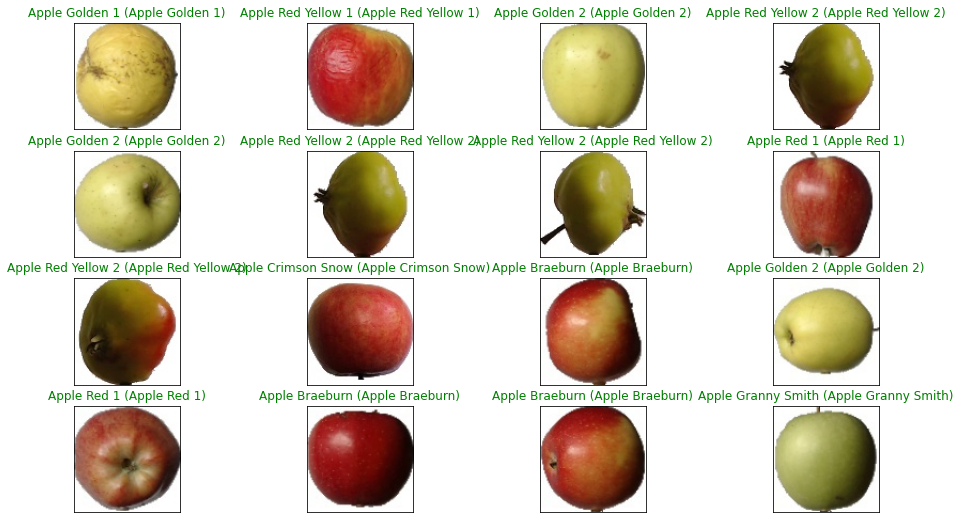

In [20]:
# Visualizing predictions

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

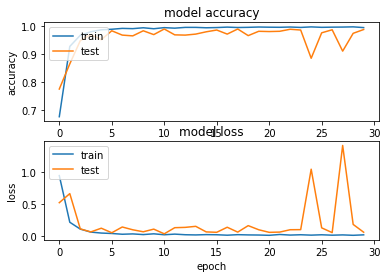

In [22]:
# Visualizing model accuracy and loss for each epoch

import matplotlib.pyplot as plt 
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   # spiking at end
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()